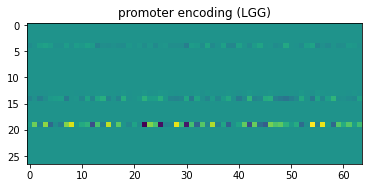

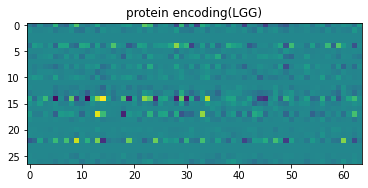

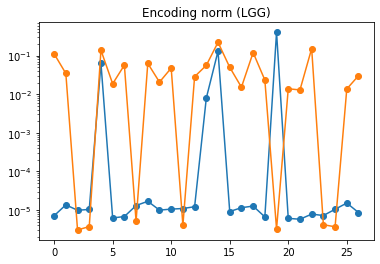

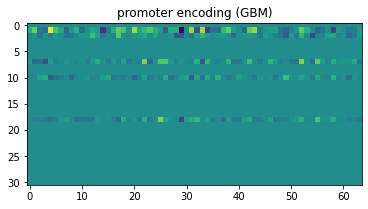

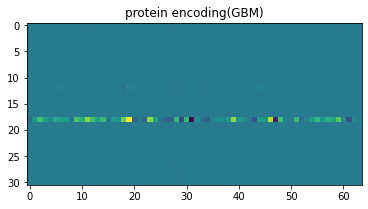

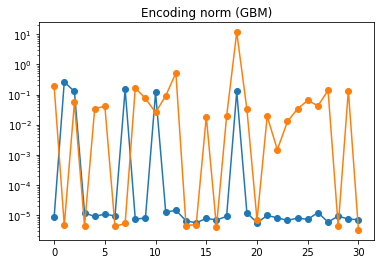

In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np


# Loading and demoing the structure of the files

filename = "/mnt/home/sgolkar/projects/cancer-net/data/brain/raw/LGG/TCGA-CS-4942-01A-01D-1468-08.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding (LGG)")
plt.show()

plt.imshow(prot)
plt.title("protein encoding(LGG)")
plt.show()

# Why are some norms so small?
# Perhaps we can drop the genese were the norm is small for both promoter and the protein?
plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm (LGG)")
plt.show()


# Another example

filename = "/mnt/home/sgolkar/projects/cancer-net/data/brain/raw/GBM/TCGA-02-0033-01A-01D-1490-08.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding (GBM)")
plt.show()

plt.imshow(prot)
plt.title("protein encoding(GBM)")
plt.show()

plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm (GBM)")
plt.show()

Error files: []
Num duplicates: 0
Num samples without data: 0

Error files:  {'GBM': [], 'LGG': []}
Cancer types per folder files numbers: {'GBM': 1, 'LGG': 1}
Duplicates per type: {'GBM': 0, 'LGG': 0}
Samples without data:  {'GBM': ['/mnt/home/sgolkar/projects/cancer-net/data/brain/raw/GBM/TCGA-15-0742-01A-01D-1492-08.h5'], 'LGG': []}
Num samples in model not in data: 52
Num samples in data not in model: 0


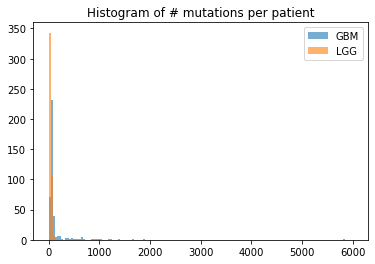

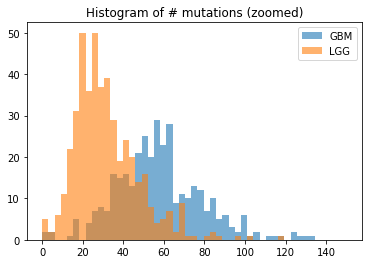

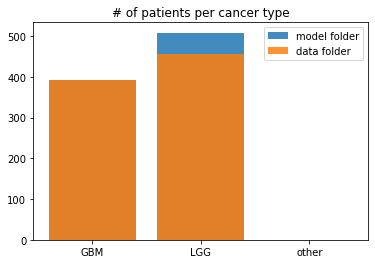

In [2]:
# Looking at the difference between the files under model and under data (Brain data)

# First, looking at the old files files under model folder.

from matplotlib import pyplot as plt
import h5py
import numpy as np
import os
from os.path import isfile, join

dataroot_model = "/mnt/home/sgolkar/projects/cancer/models/CancerGNN-06-01/data/raw"
files_model = [
    join(dataroot_model, f)
    for f in os.listdir(dataroot_model)
    if isfile(join(dataroot_model, f))
]

cancer_types_model = []
error_samples_model = []
sample_IDs_model = []
nodata_model = []
for file in files_model:
    with h5py.File(file, "r") as f:

        try:
            cancer_types_model.append(f["label"]["sample_meta"]["tumor"][()])
            sample_IDs_model.append(f["label"]["sample_id"][()])
            if "data" not in f.keys():
                nodata_model.append(file)
        except:
            error_samples_model.append(file)
        # num_mutations.append(f['meta']['mutated_gene_list'])

# The reference gene file is the only one that errors out
print("Error files:", error_samples_model)

GBM_num_model = np.sum([el == b"GBM" for el in cancer_types_model])
LGG_num_model = np.sum([el == b"LGG" for el in cancer_types_model])
other_num_model = np.sum([el != b"LGG" and el != b"GBM" for el in cancer_types_model])


print("Num duplicates: {}".format(len(set(sample_IDs_model)) - len(sample_IDs_model)))
print("Num samples without data: {}\n".format(len(nodata_model)))

# Now looking at files under the mutated genes

types = ["GBM", "LGG"]

dataroot = "/mnt/home/sgolkar/projects/cancer-net/data/brain/raw/"

cancer_types = {type: [] for type in types}
num_mutations = {type: [] for type in types}
error_samples = {type: [] for type in types}
sample_IDs = {type: [] for type in types}
nodata = {type: [] for type in types}
for type in types:
    datapath = dataroot + type
    files = [
        join(datapath, f) for f in os.listdir(datapath) if isfile(join(datapath, f))
    ]
    for file in files:
        with h5py.File(file, "r") as f:

            try:
                cancer_types[type].append(f["label"]["sample_meta"]["tumor"][()])
                num_mutations[type].append(len(f["meta"]["mutated_gene_list"][()]))
                sample_IDs[type].append(f["label"]["sample_id"][()])
                if "data" not in f.keys():
                    nodata[type].append(file)
            except:
                error_samples[type].append(file)

# The reference gene file is the only one that errors out
print("Error files: ", error_samples)

# Types of cancer per folder:
print(
    "Cancer types per folder files numbers:",
    {key: len(set(value)) for key, value in cancer_types.items()},
)

print(
    "Duplicates per type:",
    {key: len(set(value)) - len(value) for key, value in sample_IDs.items()},
)

print("Samples without data: ", nodata)


print(
    "Num samples in model not in data: {}".format(
        len(
            set(sample_IDs_model).difference(
                set([el for value in sample_IDs.values() for el in value])
            )
        )
    )
)
print(
    "Num samples in data not in model: {}".format(
        len(
            set([el for value in sample_IDs.values() for el in value]).difference(
                set(sample_IDs_model)
            )
        )
    )
)


[
    plt.hist(value, bins=np.linspace(0, 6000, 150), label=key, alpha=0.6)
    for key, value in num_mutations.items()
]
plt.title("Histogram of # mutations per patient")
plt.legend()
plt.show()

[
    plt.hist(value, bins=np.linspace(0, 150, 50), label=key, alpha=0.6)
    for key, value in num_mutations.items()
]
plt.title("Histogram of # mutations (zoomed)")
plt.legend()
plt.show()


plt.bar(
    ["GBM", "LGG", "other"],
    [GBM_num_model, LGG_num_model, other_num_model],
    label="model folder",
    alpha=0.85,
)
plt.bar(
    cancer_types.keys(),
    [len(el) for el in cancer_types.values()],
    label="data folder",
    alpha=0.85,
)
plt.title("# of patients per cancer type")
plt.legend()
plt.show()

Epoch: 10, Loss: 0.0664, Train Acc: 0.5929
Test Loss: 0.0683, Acc: 0.5389
Epoch: 20, Loss: 0.0602, Train Acc: 0.6536
Test Loss: 0.0611, Acc: 0.6500
Epoch: 30, Loss: 0.0494, Train Acc: 0.7357
Test Loss: 0.0667, Acc: 0.6389
Epoch: 40, Loss: 0.0421, Train Acc: 0.7839
Test Loss: 0.0784, Acc: 0.6500
Epoch: 50, Loss: 0.0368, Train Acc: 0.8125
Test Loss: 0.0834, Acc: 0.6333
Epoch: 60, Loss: 0.0262, Train Acc: 0.8893
Test Loss: 0.105, Acc: 0.7000
Epoch: 70, Loss: 0.0213, Train Acc: 0.9089
Test Loss: 0.117, Acc: 0.6944
Epoch: 80, Loss: 0.0198, Train Acc: 0.9268
Test Loss: 0.0991, Acc: 0.6889
Epoch: 90, Loss: 0.018, Train Acc: 0.9321
Test Loss: 0.126, Acc: 0.7000
Epoch: 100, Loss: 0.0184, Train Acc: 0.9250
Test Loss: 0.133, Acc: 0.6944


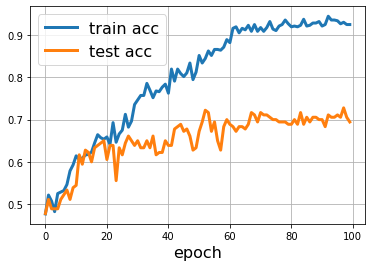

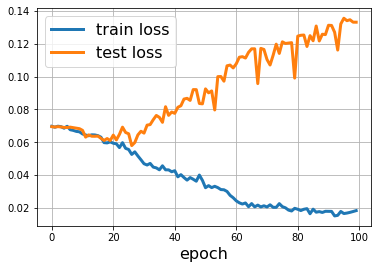

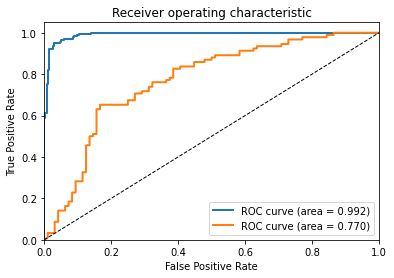

In [3]:
# Training on brain data using GCN architecture

# Hyperparameters etc:

arch = "GCN"
batch = 10
parall = False
lr = 0.005

import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/brain"
files = "/mnt/home/sgolkar/projects/cancer-net/data/brain/samples.txt"
label_mapping = ["LGG", "GBM"]
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="brain.geneSymbol.gz",
)


rng = np.random.default_rng(2022)
rnd_perm = rng.permutation(len(dataset))
train_indices = list(rnd_perm[: 3 * len(dataset) // 4])
test_indices = list(rnd_perm[3 * len(dataset) // 4 :])
train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=True,
)
test_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=True,
)

assert len(train_indices) + len(test_indices) == len(
    dataset
), "Train test split with overlap or unused samples!"

model = GCNNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    if epoch == 30:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.5

    if epoch == 60:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.1

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def test():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in test_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
test_acces = []
test_losses = []
for epoch in range(1, 101):
    report = (epoch) % 10 == 0
    train_loss, train_acc = train(epoch, report=report)
    test_loss, test_acc = test()
    train_losses.append(train_loss.cpu().detach().numpy())
    test_losses.append(test_loss)
    train_acces.append(train_acc)
    test_acces.append(test_acc)
    if report:
        print("Test Loss: {:.3g}, Acc: {:.4f}".format(test_loss, test_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(test_acces, label="test acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(test_losses, c="tab:orange", label="test loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_train, tpr_train, _ = roc_curve(ys, outs[:, 1])
train_auc = auc(fpr_train, tpr_train)

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_test, tpr_test, _ = roc_curve(ys, outs[:, 1])
test_auc = auc(fpr_test, tpr_test)

plt.plot(
    fpr_train, tpr_train, lw=2, label="ROC curve (area = %0.3f)" % train_auc,
)
plt.plot(
    fpr_test, tpr_test, lw=2, label="ROC curve (area = %0.3f)" % test_auc,
)
plt.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Processing...


loading gene graph took 152.07 seconds.


read samples:  46%|████▌     | 347/751 [09:00<10:23,  1.54s/it]  WARNING:root:Cannot load sample file: /mnt/home/sgolkar/projects/cancer-net/data/brain/raw/GBM/TCGA-15-0742-01A-01D-1492-08.h5. (no data key)


invalid sample: /mnt/home/sgolkar/projects/cancer-net/data/brain/raw/GBM/TCGA-15-0742-01A-01D-1492-08.h5


read samples: 100%|██████████| 751/751 [17:30<00:00,  1.40s/it]


Loading dataset took 1050.01 seconds.
Caching processed dataset...
 done (took 0.44 seconds).
Full processing pipeline took 1202.80 seconds.


Done!


Epoch: 10, Loss: 0.0633, Train Acc: 0.7054
Test Loss: 0.0652, Acc: 0.7111
Epoch: 20, Loss: 0.048, Train Acc: 0.7964
Test Loss: 0.039, Acc: 0.8222
Epoch: 30, Loss: 0.0269, Train Acc: 0.9018
Test Loss: 0.0363, Acc: 0.8222
Epoch: 40, Loss: 0.014, Train Acc: 0.9500
Test Loss: 0.0518, Acc: 0.8056
Epoch: 50, Loss: 0.0136, Train Acc: 0.9446
Test Loss: 0.0485, Acc: 0.8444
Epoch: 60, Loss: 0.0104, Train Acc: 0.9625
Test Loss: 0.0427, Acc: 0.8333
Epoch: 70, Loss: 0.00579, Train Acc: 0.9839
Test Loss: 0.0449, Acc: 0.8444
Epoch: 80, Loss: 0.0075, Train Acc: 0.9750
Test Loss: 0.049, Acc: 0.8333
Epoch: 90, Loss: 0.00885, Train Acc: 0.9679
Test Loss: 0.0531, Acc: 0.8444
Epoch: 100, Loss: 0.0107, Train Acc: 0.9589
Test Loss: 0.0518, Acc: 0.8167


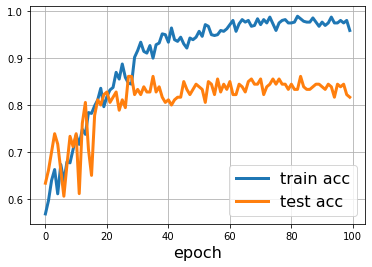

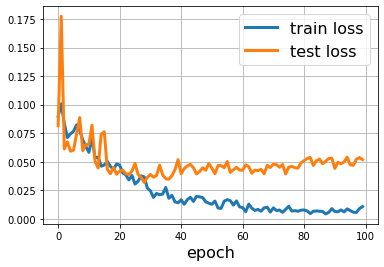

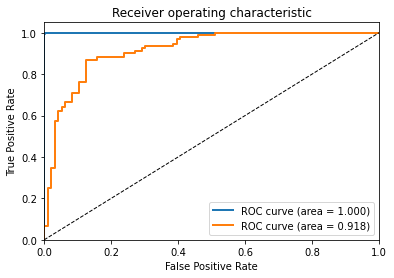

In [4]:
# Training on brain data using GCN2 architecture

# Hyperparameters etc:

arch = "GCN2"
batch = 10
parall = False
lr = 0.005

import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/brain"
files = "/mnt/home/sgolkar/projects/cancer-net/data/brain/samples.txt"
label_mapping = ["LGG", "GBM"]

pre_transform = T.Compose([T.GCNNorm(), T.ToSparseTensor()])
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="brain.geneSymbol.gz",
    transform=pre_transform,
    suffix="sparse",
)


rng = np.random.default_rng(2022)
rnd_perm = rng.permutation(len(dataset))
train_indices = list(rnd_perm[: 3 * len(dataset) // 4])
test_indices = list(rnd_perm[3 * len(dataset) // 4 :])
train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=True,
)
test_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=True,
)

assert len(train_indices) + len(test_indices) == len(
    dataset
), "Train test split with overlap or unused samples!"

model = GCN2Net(
    hidden_channels=2048,
    num_layers=4,
    alpha=0.5,
    theta=1.0,
    shared_weights=False,
    dropout=0.2,
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


def train(epoch, report=True):
    model.train()

    if epoch == 30:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.5

    if epoch == 60:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.1

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps


def test():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in test_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps


train_losses = []
train_acces = []
test_acces = []
test_losses = []
for epoch in range(1, 101):
    report = (epoch) % 10 == 0
    train_loss, train_acc = train(epoch, report=report)
    test_loss, test_acc = test()
    train_losses.append(train_loss.cpu().detach().numpy())
    test_losses.append(test_loss)
    train_acces.append(train_acc)
    test_acces.append(test_acc)
    if report:
        print("Test Loss: {:.3g}, Acc: {:.4f}".format(test_loss, test_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(test_acces, label="test acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(test_losses, c="tab:orange", label="test loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_train, tpr_train, _ = roc_curve(ys, outs[:, 1])
train_auc = auc(fpr_train, tpr_train)

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_test, tpr_test, _ = roc_curve(ys, outs[:, 1])
test_auc = auc(fpr_test, tpr_test)

plt.plot(
    fpr_train, tpr_train, lw=2, label="ROC curve (area = %0.3f)" % train_auc,
)
plt.plot(
    fpr_test, tpr_test, lw=2, label="ROC curve (area = %0.3f)" % test_auc,
)
plt.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()